# Explore here

In [2]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import missingno as msno
from numpy import NaN
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from lazypredict.Supervised import LazyRegressor
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib



In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df = pd.DataFrame(dataset)
df['room_type']



0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [4]:
def room_type(df):
    Entire = []
    Shared = []
    Private = []
    for room in df['room_type']:
        if room == 'Private room':
            Entire.append(0)
            Shared.append(0)
            Private.append(1)
        elif room == 'Entire home/apt':
            Entire.append(1)
            Shared.append(0)
            Private.append(0)
        if room == 'Shared room':
            Entire.append(0)
            Shared.append(1)
            Private.append(0)
    df['Entire room/apt'] = Entire
    df['Private room'] = Private
    df['Shared room'] = Shared

    return df

room_type(df)


            




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire room/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9,0,1,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36,0,1,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2,0,0,1


In [5]:
np.unique(df['neighbourhood_group'])

def neighbourhood(df):
    Bronx = []
    Manhattan = []
    Queens = []
    Staten_Island = []
    Brooklyn = []
    for room in df['neighbourhood_group']:
        if room == 'Bronx':
            Bronx.append(1)
            Queens.append(0)
            Manhattan.append(0)
            Staten_Island.append(0)
            Brooklyn.append(0)
        elif room == 'Brooklyn':
            Bronx.append(0)
            Queens.append(0)
            Manhattan.append(0)
            Staten_Island.append(0)
            Brooklyn.append(1)
        elif room == 'Manhattan':
            Bronx.append(0)
            Queens.append(0)
            Manhattan.append(1)
            Staten_Island.append(0)
            Brooklyn.append(0)
        elif room == 'Queens':
            Bronx.append(0)
            Queens.append(1)
            Manhattan.append(0)
            Staten_Island.append(0)
            Brooklyn.append(0)
        elif room == 'Staten Island':
            Bronx.append(0)
            Queens.append(0)
            Manhattan.append(0)
            Staten_Island.append(1)
            Brooklyn.append(0)
    df['Bronx'] = Bronx
    df['Manhattan'] = Manhattan
    df['Brooklyn'] = Brooklyn
    df['Staten Island'] = Staten_Island
    df['Queens'] = Queens
    return df

neighbourhood(df)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,...,6,365,0,1,0,0,0,1,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,...,2,355,1,0,0,0,1,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,...,1,365,0,1,0,0,1,0,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,...,1,194,1,0,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,...,2,9,0,1,0,0,0,1,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,...,2,36,0,1,0,0,0,1,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,...,1,27,1,0,0,0,1,0,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,...,6,2,0,0,1,0,1,0,0,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
count_unique = df.nunique()
print(count_unique)
df.describe()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
Entire room/apt                       2
Private room                          2
Shared room                           2
Bronx                                 2
Manhattan                             2
Brooklyn                              2
Staten Island                         2
Queens                                2
dtype: int64


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,19017143.24,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78,0.52,0.46,0.02,0.02,0.44,0.41,0.01,0.12
std,10983108.39,78610967.03,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62,0.50,0.50,0.15,0.15,0.50,0.49,0.09,0.32
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9471945.00,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,19677284.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,29152178.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

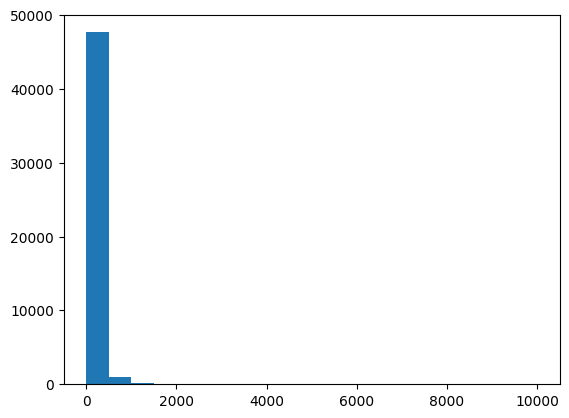

In [8]:
y = df.price.values
#replace 0 price values by price average of similar advertisements
imp_knn = KNNImputer(n_neighbors=3)
df['price'] = df['price'].replace(0, np.nan)
df[['price']] = imp_knn.fit_transform(df[['price']])  

plt.hist(y, bins=20)
plt.show


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e6b37f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e6b38c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e6b37eb90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e6b38e050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e6b38ea90>],
 'means': []}

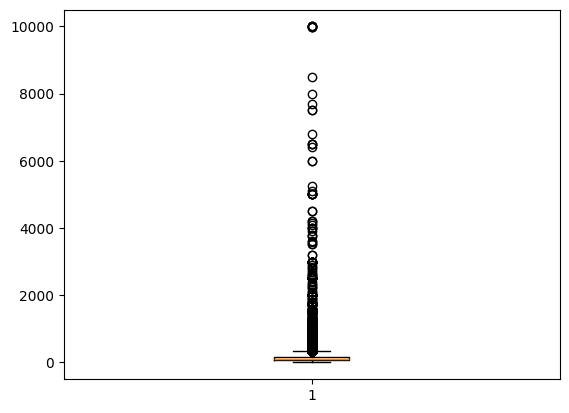

In [9]:
plt.boxplot(y)

In [10]:
df['log_price'] = np.log(df.price)

[]

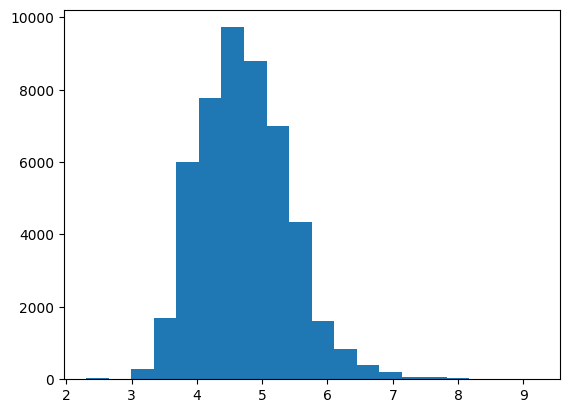

In [11]:
plt.hist(df['log_price'], bins=20)
plt.plot()


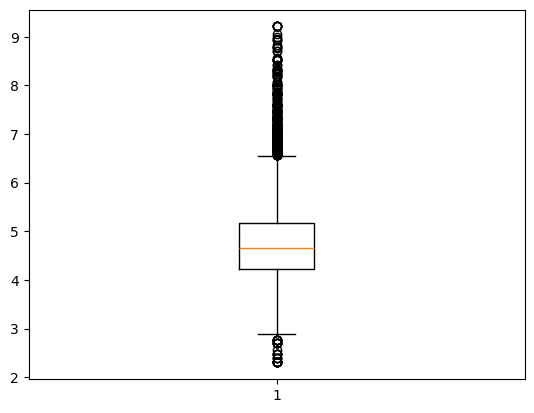

In [12]:
plt.boxplot(df['log_price'])
plt.show()

In [13]:
df.isna().mean()*100

id                                0.00
name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
Entire room/apt                   0.00
Private room                      0.00
Shared room                       0.00
Bronx                             0.00
Manhattan                         0.00
Brooklyn                          0.00
Staten Island                     0.00
Queens                            0.00
log_price                         0.00
dtype: float64

In [14]:
#The following columns are removed because they do not signifficantly affect the price of the propperty and because they have signifficant gaps in the data, which would lead to problems with the model
df.drop(['last_review', 'reviews_per_month'], inplace=True, axis=1)

#Drop irrelevant data (The following variables do not contribute to the variability in price of the propperty for self apparent reasons)
df.drop(['id', 'name', 'host_id', 'host_name'], inplace=True, axis=1)

<Axes: >

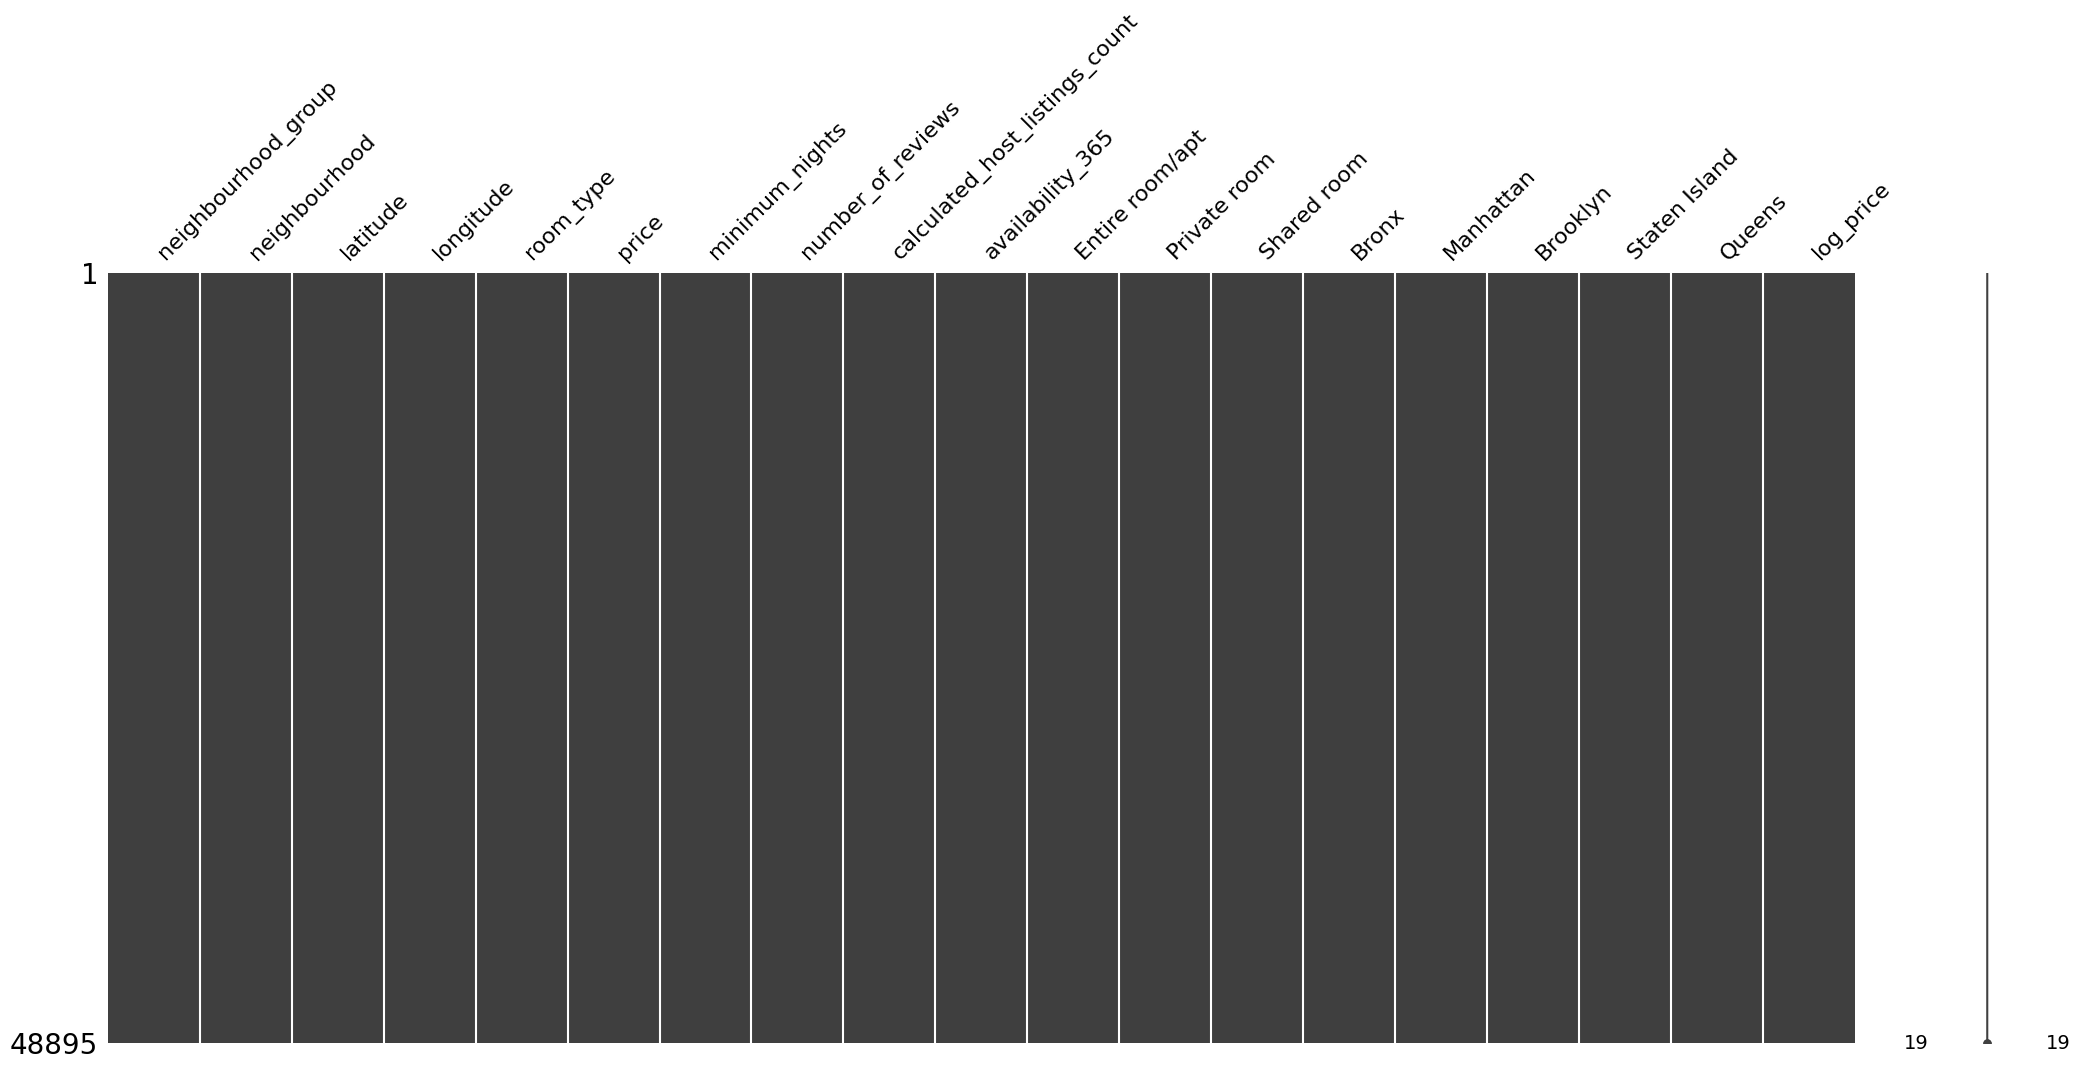

In [15]:
msno.matrix(df)


In [16]:
x = np.asarray(df.drop(['price', 'log_price', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1))
y = df['log_price']

print(x)

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()



[[ 40.64749 -73.97237   1.      ...   1.        0.        0.     ]
 [ 40.75362 -73.98377   1.      ...   0.        0.        0.     ]
 [ 40.80902 -73.9419    3.      ...   0.        0.        0.     ]
 ...
 [ 40.81475 -73.94867  10.      ...   0.        0.        0.     ]
 [ 40.75751 -73.99112   1.      ...   0.        0.        0.     ]
 [ 40.76404 -73.98933   7.      ...   0.        0.        0.     ]]


In [17]:
cooks_distance = model.get_influence().cooks_distance[0]

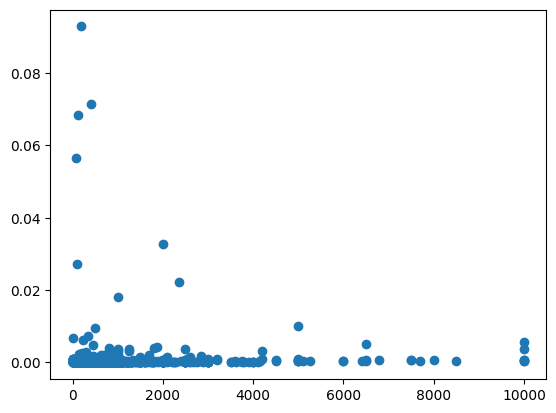

In [18]:
plt.scatter(df.price, cooks_distance)
plt.show()

In [19]:
np.where(cooks_distance>0.08)
df.drop([5767], axis=0, inplace=True)


In [20]:
df.drop(['minimum_nights'], inplace=True, axis=1)

In [21]:
df_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
df_num.apply(lambda x: x.skew())

latitude                          0.24
longitude                         1.28
price                            19.12
number_of_reviews                 3.69
calculated_host_listings_count    7.93
availability_365                  0.76
Entire room/apt                  -0.08
Private room                      0.17
Shared room                       6.26
Bronx                             6.47
Manhattan                         0.23
Brooklyn                          0.36
Staten Island                    11.32
Queens                            2.40
log_price                         0.61
dtype: float64

In [22]:
binary_cols = df[(df==0)|(df==1)].dropna(axis=1).columns
binary_cols



Index(['Entire room/apt', 'Private room', 'Shared room', 'Bronx', 'Manhattan',
       'Brooklyn', 'Staten Island', 'Queens'],
      dtype='object')

In [23]:
df_numerical= df.drop(binary_cols, axis=1)
print(df_numerical)

df_numerical = df_numerical.drop(['neighbourhood', 'neighbourhood_group', 'room_type'], axis = 1)

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington     40.65     -73.97   
1               Manhattan             Midtown     40.75     -73.98   
2               Manhattan              Harlem     40.81     -73.94   
3                Brooklyn        Clinton Hill     40.69     -73.96   
4               Manhattan         East Harlem     40.80     -73.94   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant     40.68     -73.95   
48891            Brooklyn            Bushwick     40.70     -73.93   
48892           Manhattan              Harlem     40.81     -73.95   
48893           Manhattan      Hell's Kitchen     40.76     -73.99   
48894           Manhattan      Hell's Kitchen     40.76     -73.99   

             room_type  price  number_of_reviews  \
0         Private room 149.00                  9   
1      Entire home/apt 225.00                 45   
2  

In [24]:
print(df_numerical)

       latitude  longitude  price  number_of_reviews  \
0         40.65     -73.97 149.00                  9   
1         40.75     -73.98 225.00                 45   
2         40.81     -73.94 150.00                  0   
3         40.69     -73.96  89.00                270   
4         40.80     -73.94  80.00                  9   
...         ...        ...    ...                ...   
48890     40.68     -73.95  70.00                  0   
48891     40.70     -73.93  40.00                  0   
48892     40.81     -73.95 115.00                  0   
48893     40.76     -73.99  55.00                  0   
48894     40.76     -73.99  90.00                  0   

       calculated_host_listings_count  availability_365  log_price  
0                                   6               365       5.00  
1                                   2               355       5.42  
2                                   1               365       5.01  
3                                   1              

In [25]:
#  para calcular IQR y aplicar winsorización
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

In [26]:
#Calcular IQR y aplicar Widsorizacion a cada columna

for column in df_numerical.columns:
    df_numerical[column] = winsorize_column(df_numerical[column], 0.1, 0.9)


In [27]:
df_numerical.apply(lambda x: x.skew())

latitude                         0.24
longitude                        1.21
price                            2.11
number_of_reviews                2.47
calculated_host_listings_count   2.47
availability_365                 0.76
log_price                        0.56
dtype: float64

In [28]:
df_new = pd.concat([df_numerical, df[binary_cols]], axis=1 )
df_new.head()

,latitude,longitude,price,number_of_reviews,calculated_host_listings_count,availability_365,log_price,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
0,40.65,-73.97,149.00,9,6,365,5.00,0,1,0,0,0,1,0,0
1,40.75,-73.98,225.00,45,2,355,5.42,1,0,0,0,1,0,0,0
2,40.81,-73.94,150.00,0,1,365,5.01,0,1,0,0,1,0,0,0
3,40.69,-73.96,89.00,175,1,194,4.49,1,0,0,0,0,1,0,0
4,40.80,-73.94,80.00,9,1,0,4.38,1,0,0,0,1,0,0,0


In [29]:
from sklearn.ensemble import IsolationForest
# Crea un modelo de Isolation Forest y ajustalo a los datos
model = IsolationForest().fit(df_new)

# Predice si cada observación es un valor atípico (anomalía) o no
predictions = model.predict(df_new)

# 'predictions' contendrá 1 para observaciones normales y -1 para valores atípicos
print(f'Observaciones predichas como atípicas: {np.where(predictions==-1)[0]}')


Observaciones predichas como atípicas: [    0     7     9 ... 48877 48888 48892]


In [30]:
len(np.where(predictions == -1)[0])

11004

In [31]:
df_corr = df_new.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,latitude,longitude,price,number_of_reviews,calculated_host_listings_count,availability_365,log_price,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Staten Island,Queens
latitude,1.000,0.087,0.065,-0.019,0.034,-0.011,0.080,-0.006,0.004,0.004,0.331,0.591,-0.673,-0.191,0.017
longitude,0.087,1.000,-0.281,0.058,-0.011,0.083,-0.333,-0.195,0.187,0.031,0.228,-0.442,0.021,-0.285,0.625
price,0.065,-0.281,1.000,-0.065,0.048,0.123,0.928,0.501,-0.470,-0.105,-0.077,0.302,-0.177,-0.034,-0.152
number_of_reviews,-0.019,0.058,-0.065,1.000,-0.049,0.183,-0.041,-0.004,0.011,-0.025,0.012,-0.050,0.023,0.019,0.032
calculated_host_listings_count,0.034,-0.011,0.048,-0.049,1.000,0.416,0.012,-0.041,0.014,0.089,-0.004,0.099,-0.118,0.002,0.030
availability_365,-0.011,0.083,0.123,0.183,0.416,1.000,0.099,-0.007,-0.011,0.058,0.061,-0.005,-0.080,0.058,0.087
log_price,0.080,-0.333,0.928,-0.041,0.012,0.099,1.000,0.618,-0.567,-0.173,-0.105,0.349,-0.192,-0.045,-0.185
Entire room/apt,-0.006,-0.195,0.501,-0.004,-0.041,-0.007,0.618,1.000,-0.953,-0.162,-0.052,0.160,-0.074,-0.008,-0.108
Private room,0.004,0.187,-0.470,0.011,0.014,-0.011,-0.567,-0.953,1.000,-0.143,0.043,-0.158,0.079,0.008,0.101
Shared room,0.004,0.031,-0.105,-0.025,0.089,0.058,-0.173,-0.162,-0.143,1.000,0.031,-0.009,-0.017,0.000,0.027


In [32]:
df_corr[df_corr.log_price.abs() < 0.1].index

Index(['latitude', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'Staten Island'],
      dtype='object')

In [33]:
df_corr[df_corr.log_price.abs() > 0.4].index

Index(['price', 'log_price', 'Entire room/apt', 'Private room'], dtype='object')

In [34]:
#Calculate the Variance Inflation Factor (Measures the influence to a variable's variance by other variables.)

vif = pd.Series([variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])], index=df_new.columns)

vif

latitude                                42.30
longitude                               51.93
price                                  528.72
number_of_reviews                        1.56
calculated_host_listings_count           2.69
availability_365                         3.02
log_price                              779.02
Entire room/apt                           inf
Private room                              inf
Shared room                               inf
Bronx                              3386394.04
Manhattan                          1905500.23
Brooklyn                           1124685.57
Staten Island                    135069926.79
Queens                             1338426.81
dtype: float64

In [35]:
X = df_new.drop(['log_price', 'price'], axis=1)
y = df_new['log_price']

In [36]:
#Crear Modelo con 20% de los datos, el 80% restante se utilizará para entrenay y mejorar el modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

In [38]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
#How much the variable affects the studied variable, in this case the price.

model.feature_importances_

array([0.01103322, 0.01446696, 0.00582402, 0.00873667, 0.00927156,
       0.6437247 , 0.02346188, 0.00344911, 0.00744246, 0.26090652,
       0.00435566, 0.00193088, 0.00539638], dtype=float32)

In [40]:
feature_names = X.columns

In [41]:
d_imp = dict(zip(feature_names,  model.feature_importances_))
d_imp

{'latitude': 0.011033217,
 'longitude': 0.014466955,
 'number_of_reviews': 0.0058240173,
 'calculated_host_listings_count': 0.00873667,
 'availability_365': 0.00927156,
 'Entire room/apt': 0.6437247,
 'Private room': 0.023461876,
 'Shared room': 0.0034491075,
 'Bronx': 0.0074424637,
 'Manhattan': 0.26090652,
 'Brooklyn': 0.004355659,
 'Staten Island': 0.0019308812,
 'Queens': 0.005396376}

In [42]:
#Order variables by importance

for k, v in dict(sorted(d_imp.items(), key=lambda x:x[1], reverse = True)).items():
  print(k, v)

Entire room/apt 0.6437247
Manhattan 0.26090652
Private room 0.023461876
longitude 0.014466955
latitude 0.011033217
availability_365 0.00927156
calculated_host_listings_count 0.00873667
Bronx 0.0074424637
number_of_reviews 0.0058240173
Queens 0.005396376
Brooklyn 0.004355659
Shared room 0.0034491075
Staten Island 0.0019308812


In [43]:
# Input: d_imp, corr_mat, imp_cut, corr_cut
# Output: ls_vars_to_drop
def get_vars_to_delete(d_imp, corr_mat, imp_cut=0.01, corr_cut=0.1):
  # Inicializo una lista vacía que contendrá las columnas a eliminar
  ls_res = []
  # Identifico aquellas variables cuya correlación en absoluto con la variable LOG_PRICE es menor a corr_cut
  low_corr_vars = corr_mat[corr_mat.LOG_PRICE.abs()<corr_cut].index
  # Para cada una de esas variables
  for var_name in low_corr_vars:
    # Compruebo si su impotarcia es menor a imp_cut
    if d_imp[var_name]<imp_cut:
      # De ser así guardo el nombre de la variable
      ls_res.append(var_name)
  # Retorno la lista
  return ls_res

In [44]:
X_copy = X_train.copy()
X_copy['LOG_PRICE'] = y_train.values

vars_to_delete =  get_vars_to_delete(d_imp, X_copy.corr())
vars_to_delete

['number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'Staten Island']

In [45]:
X_train.drop(vars_to_delete, axis=1, inplace=True)
X_test.drop(vars_to_delete, axis=1, inplace=True)

In [46]:
binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [47]:
#Escalar las variables numericas a valores entre 0 y 1, entrenar el scaler con los training values

scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [48]:
#utilizar los parametros del scaler obtenidos para transformar todos los valores de testeo y entrenamiento

X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [49]:
X_train[binary_cols]

,Entire room/apt,Private room,Shared room,Bronx,Manhattan,Brooklyn,Queens
38523,0,1,0,0,0,1,0
21986,0,1,0,0,0,1,0
31181,0,1,0,0,1,0,0
47177,0,1,0,0,0,1,0
7276,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
11285,0,1,0,0,1,0,0
44733,0,1,0,0,0,1,0
38159,0,0,1,0,0,1,0
860,1,0,0,0,1,0,0


In [50]:
#Tras el escalado podemos recomponer el DataFrame juntando las variables numericas y binarias

X_train_sc = pd.concat([pd.DataFrame(data=X_train_num_sc, columns=X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(data=X_test_num_sc, columns=X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [51]:
#Hacer un PCA para reducir las variables cuya variabilidad no es estadísticamente significativa y, por lo tanto, no añade información significativa al modelo.
#El PCA conserva el 99% de la variabilidad del PCA

pca = PCA(.99)

X_pca_train = pca.fit_transform(X_train_sc)



In [52]:
#El PCA indica que 6 variables satisfacen la condición necesária de variablidad y, por lo tanto, son significativas.

X_pca_train.shape

(39115, 6)

In [53]:
#Describe el porcentaje sobre la variabilidad total del DataSet que pertenece a una variable.

pca.explained_variance_ratio_

print(f'Número de variables antes de PCA {X_train_sc.shape[1]}, número de variables tras aplicar la técnica de PCA {X_pca_train.shape[1]}')

Número de variables antes de PCA 9, número de variables tras aplicar la técnica de PCA 6


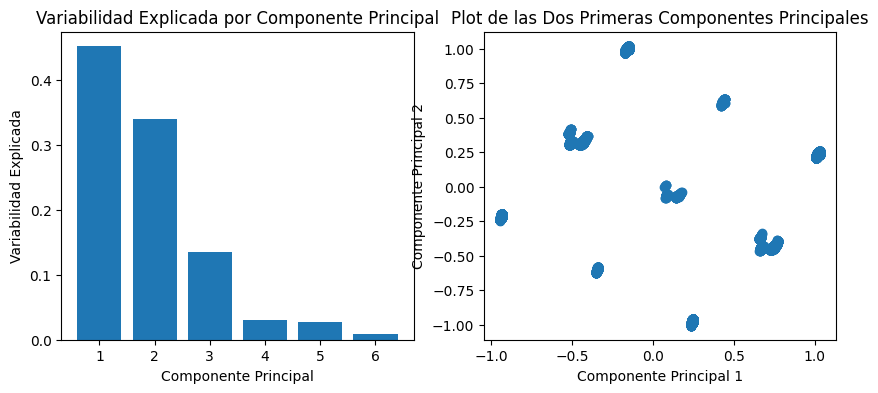

In [54]:
#VISUALIZACIÓN DEL PCA

# Obtén las dos primeras componentes principales
componente_1 = X_pca_train[:, 0]
componente_2 = X_pca_train[:, 1]

# Calcula la variabilidad explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Crea un bar plot de la variabilidad explicada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Variabilidad Explicada por Componente Principal')

# Crea un scatter plot de las dos primeras componentes principales
plt.subplot(1, 2, 2)
plt.scatter(componente_1, componente_2)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Plot de las Dos Primeras Componentes Principales')
plt.show()

In [55]:
X_pca_test = pca.transform(X_test_sc)

In [56]:
#Lazypredict para comparar rendimiento de diferentes algoritmos 

reg = LazyRegressor()
models, predictions = reg.fit(X_pca_train, X_pca_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

 60%|█████▉    | 25/42 [00:23<00:07,  2.24it/s]

In [ ]:
print(models)


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.55       0.55  0.47        0.44
LGBMRegressor                                0.55       0.55  0.47        0.37
XGBRegressor                                 0.54       0.54  0.47        0.32
GradientBoostingRegressor                    0.53       0.53  0.47        9.41
MLPRegressor                                 0.52       0.52  0.48        6.68
NuSVR                                        0.52       0.52  0.48       76.55
SVR                                          0.51       0.51  0.48       57.04
RandomForestRegressor                        0.50       0.50  0.49       29.80
KNeighborsRegressor                          0.47       0.47  0.50        0.13
LassoCV                                      0.47       0.47  0.50        0.26
ElasticNetCV                                 0.47   

In [ ]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

model = lgb.LGBMRegressor()

# Definimos una grilla de hiperparámetros para muestrear
param_dist = {
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'n_estimators': sp_randint(50, 200),  # Número de estimadores
    'max_depth': sp_randint(1, 10),       # Profundidad máxima del árbol
    'learning_rate': np.logspace(-3, 0, num=100),  # Tasa de aprendizaje
    'num_leaves': sp_randint(10, 100),   # Número máximo de hojas en un árbol
    'reg_alpha': np.logspace(-3, 3, num=100),  # Regularización L1
    'reg_lambda': np.logspace(-3, 3, num=100),  # Regularización L2
}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1)
random_search.fit(X_pca_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(-1*random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start traini

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start traini

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start traini

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.726167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.729251
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 6
[LightGBM] [Info] Start training from score 4.724189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001966 seconds.
You can set `force_col_wise=tr

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [ ]:
# Define el espacio de búsqueda de hiperparámetros
search_space = {
    'boosting_type': ['gbdt'],
    'n_estimators': Integer(150, 200),
    'max_depth': Integer(5, 15),
    'learning_rate': Real(0.01, 0.1),
    'num_leaves': Integer(30, 50),
    'reg_alpha': Real(0.01, 0.1),
    'reg_lambda': Real(0.1, 0.9)
}

# Inicializa el objeto BayesSearchCV
opt = BayesSearchCV(
    lgb.LGBMRegressor(),
    search_space,
    n_iter=50,  # Número de iteraciones de la búsqueda
    cv=5,       # Número de divisiones en validación cruzada
    n_jobs=-1,
    random_state=42,
    scoring='neg_root_mean_squared_error',  # Métrica a optimizar
    verbose=2
)

# Realiza la búsqueda bayesiana
opt.fit(X_pca_train, y_train)

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(-1*opt.best_score_)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations